In [1]:
import pandas as pd
TrainingLabels = pd.read_csv('Training labels.csv', index_col='id')
TrainingFeatures = pd.read_csv('Training features.csv', index_col='id')
TestFeatures = pd.read_csv('Test features.csv', index_col='id')
preprocess = pd.concat([TrainingFeatures,TestFeatures])
# preprocess.drop(['wpt_name','num_private','subvillage','region','lga','ward','recorded_by','scheme_name',
# 'extraction_type_group','extraction_type_class','payment_type','water_quality','quantity_group','source_type',
# 'source_class','waterpoint_type_group','date_recorded'],axis=1,inplace=True)

In [8]:
TrainingFeatures['date_recorded'] = TrainingFeatures['date_recorded'].str.split('-',expand=True)[0]
TrainingFeatures.groupby(['date_recorded'])['date_recorded'].count()

date_recorded
2002        1
2004       30
2011    28674
2012     6424
2013    24271
Name: date_recorded, dtype: int64

In [2]:
import pandas_profiling as pp
import pandas as pd
CleanedTrainingFeatures = pd.read_csv('training_cleaned_mode.csv', index_col='id')
pp.ProfileReport(preprocess, title = 'Pandas Profiling report of "Train" set', html = {'style':{'full_width': True}})

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]


In [3]:
pd.crosstab(index=preprocess.waterpoint_type_group,columns=preprocess.waterpoint_type)

NameError: name 'preprocess' is not defined

<AxesSubplot:xlabel='population', ylabel='status'>

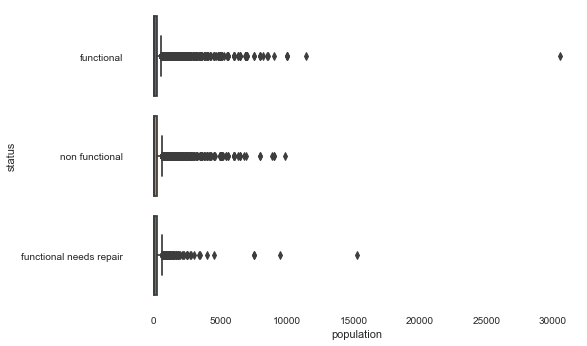

In [13]:
import seaborn as sbs
TrainingFeatures['status'] = TrainingLabels['status_group']
sbs.boxplot(x='population',y='status',data=TrainingFeatures)

<AxesSubplot:xlabel='population', ylabel='status'>

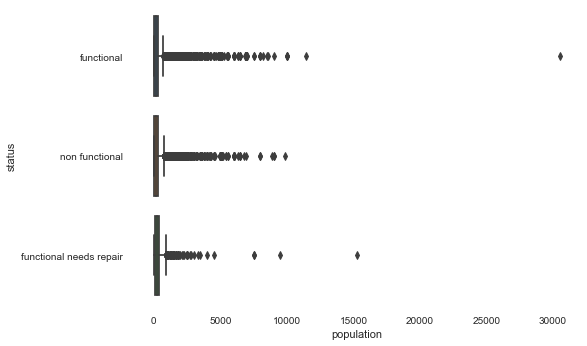

In [14]:
import numpy as np
TrainingFeatures['population'].replace(to_replace=0, value=np.nan, inplace=True)
sbs.boxplot(x='population',y='status',data=TrainingFeatures)

In [36]:
TrainingFeatures.loc[TrainingFeatures['population'] == 0]

amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
19728         NaN    2011-07-13             Action In A         NaN   
19816         NaN    2012-10-01                    Dwsp         NaN   
54551         NaN    2012-10-09                   Rwssp         NaN   
53934         NaN    2012-11-03                Wateraid         NaN   
46144         NaN    2011-08-03             Isingiro Ho         NaN   
...           ...           ...                     ...         ...   
72148         NaN    2011-07-10                 Concern         NaN   
40607         NaN    2011-04-15  Government Of Tanzania         NaN   
48348         NaN    2012-10-27                 Private         NaN   
37057         NaN    2011-04-11                     NaN         NaN   
31282         NaN    2011-03-08                   Malec         NaN   

        installer  longitude  latitude           wpt_name  num_private  \
id                                                                       
19728     Artisan  31.130847 -1.825359            Shuleni            0   
19816        DWSP  33.362410 -3.766365         Kwa Ngomho            0   
54551         DWE  32.620617 -4.226198       Tushirikiane            0   
53934   Water Aid  32.711100 -5.146712  Kwa Ramadhan Musa            0   
46144     Artisan  30.626991 -1.257051            Kwapeto            0   
...           ...        ...       ...                ...          ...   
72148     CONCERN  30.667805 -2.483710           Chamkube            0   
40607  Government  33.009440 -8.520888     Benard Charles            0   
48348     Private  33.866852 -4.287410          Kwa Peter            0   
37057         NaN  34.017087 -8.750434            Mashine            0   
31282        Musa  35.861315 -6.378573             Mshoro            0   

                 basin  ... quality_group      quantity  quantity_group  \
id                      ...                                               
19728    Lake Victoria  ...          good      seasonal        seasonal   
19816         Internal  ...          good        enough          enough   
54551  Lake Tanganyika  ...         milky        enough          enough   
53934  Lake Tanganyika  ...         salty      seasonal        seasonal   
46144    Lake Victoria  ...          good        enough          enough   
...                ...  ...           ...           ...             ...   
72148    Lake Victoria  ...          good  insufficient    insufficient   
40607       Lake Rukwa  ...          good        enough          enough   
48348         Internal  ...          good  insufficient    insufficient   
37057           Rufiji  ...      fluoride        enough          enough   
31282           Rufiji  ...          good  insufficient    insufficient   

                     source           source_type source_class  \
id                                                               
19728  rainwater harvesting  rainwater harvesting      surface   
19816           machine dbh              borehole  groundwater   
54551          shallow well          shallow well  groundwater   
53934           machine dbh              borehole  groundwater   
46144          shallow well          shallow well  groundwater   
...                     ...                   ...          ...   
72148                spring                spring  groundwater   
40607                spring                spring  groundwater   
48348                   dam                   dam      surface   
37057           machine dbh              borehole  groundwater   
31282          shallow well          shallow well  groundwater   

          waterpoint_type waterpoint_type_group          status binned  
id                                                                      
19728  communal standpipe    communal standpipe      functional    NaN  
19816           hand pump             hand pump  non functional   

In [48]:
bins = [-1,0,50, 200, 31000]
labels = [1,2,3,4]
TrainingFeatures['population'].fillna(0,inplace=True)
TrainingFeatures['binned'] = pd.cut(TrainingFeatures['population'], bins=bins, labels=labels)

<AxesSubplot:xlabel='binned', ylabel='Count'>

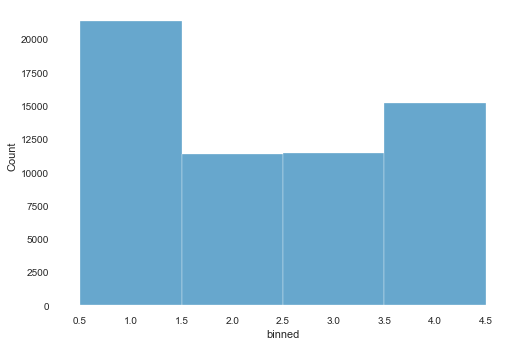

In [49]:
sns.histplot(x=TrainingFeatures["binned"])

<AxesSubplot:xlabel='amount_tsh', ylabel='status'>

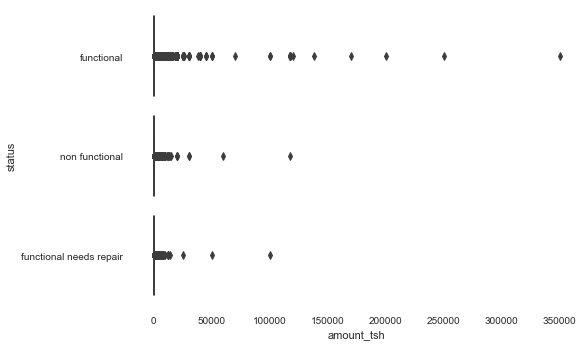

In [9]:
sbs.boxplot(x='amount_tsh',y='status',data=TrainingFeatures)

<AxesSubplot:xlabel='amount_tsh', ylabel='status'>

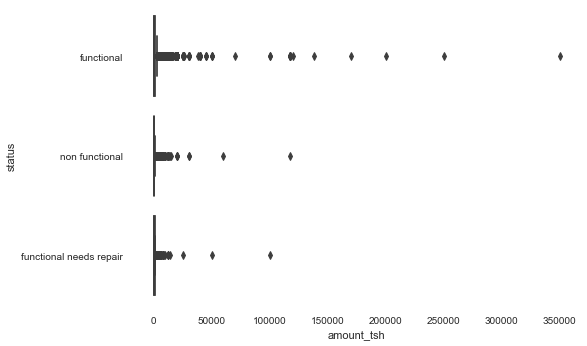

In [10]:
TrainingFeatures['amount_tsh'].replace(to_replace=0, value=np.nan, inplace=True)
sbs.boxplot(x='amount_tsh',y='status',data=TrainingFeatures)

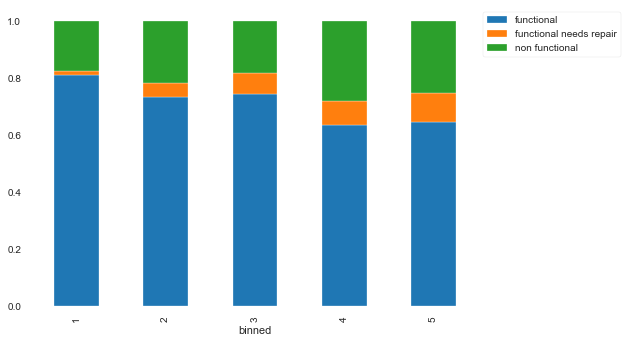

In [47]:
import numpy as np
TrainingFeatures['status'] = TrainingLabels['status_group']
variable = 'binned'
df_pct = (TrainingFeatures.groupby([variable,'status'])['amount_tsh'].count()/TrainingFeatures.groupby([variable])['amount_tsh'].count())
df_pct.unstack().plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

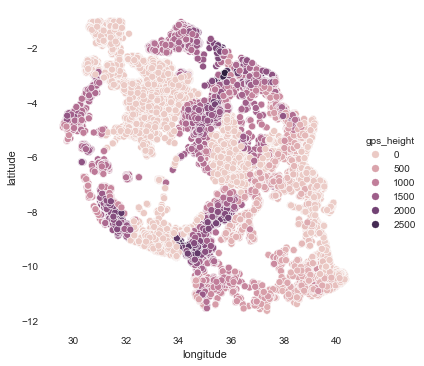

In [12]:
import numpy as np

preprocess['longitude'].replace(to_replace=0, value=np.nan, inplace=True)  
preprocess['latitude'].replace(to_replace=0, value=np.nan, inplace=True)  
import seaborn as sns
sns.relplot(x="longitude", y="latitude",hue = "gps_height", data=preprocess);

In [ ]:
import numpy as np
import re
from collections import defaultdict

preprocess['wpt_name'] = preprocess['wpt_name'].astype(str).str.lower()
words = defaultdict(int)
for funder in preprocess['wpt_name']:
    for word in re.split('"|/|\s',funder):
        words[word]+=1
{k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}